PyGSLIB
========

Bicalib
---------------

The GSLIb equivalent parameter file is

```
                     Parameters for BICALIB
                     **********************
 
START OF PARAMETERS:
data/ydata.dat                 \file with secondary data
4                                 \   column for secondary variable
data/cluster.dat               \file with calibration scatterplot
3  4  5                           \   columns of pri, sec, and weight
-1.0e21   1.0e21                  \   trimming limits
bicalib.out                       \file for output data / distributions
bicalib.cal                       \file for output calibration (SISIM)
bicalib.rep                       \file for calibration report
5                                 \number of thresholds on primary
0.50 1.00 2.50 5.00 10.0          \   thresholds on primary
5                                 \number of thresholds on secondary
0.50 1.00 2.50 5.00 10.0          \   thresholds on secondary
```


In [1]:
#general imports
import matplotlib.pyplot as plt   
import pygslib 
import numpy as np
import pandas as pd

#make the plots inline
%matplotlib inline  

Getting the data ready for work
---------
If the data is in GSLIB format you can use the function `gslib.read_gslib_file(filename)` to import the data into a Pandas DataFrame. 


In [2]:
#get the data in gslib format into a pandas Dataframe
cluster= pygslib.gslib.read_gslib_file('../data/cluster.dat')  
ydata  = pygslib.gslib.read_gslib_file('../data/ydata.dat')  

ydata.head()

,Xlocation,Ylocation,Primary,Secondary
0,0.5,0.5,-1.0,3.26
1,1.5,0.5,-1.0,2.64
2,2.5,0.5,-1.0,2.15
3,3.5,0.5,-1.0,1.69
4,4.5,0.5,-1.0,0.51


In [3]:
cluster.head()

,Xlocation,Ylocation,Primary,Secondary,Declustering Weight
0,39.5,18.5,0.06,0.22,1.619
1,5.5,1.5,0.06,0.27,1.619
2,38.5,5.5,0.08,0.40,1.416
3,20.5,1.5,0.09,0.39,1.821
4,27.5,14.5,0.09,0.24,1.349


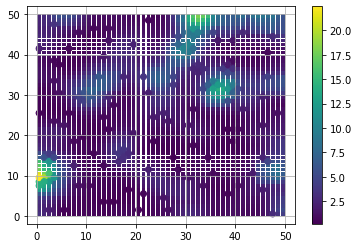

In [4]:
#view data in a 2D projection
plt.scatter(ydata['Xlocation'],ydata['Ylocation'], c=ydata['Secondary'],
            alpha=1, s=15, marker =',', linewidths= (0,))
plt.scatter(cluster['Xlocation'],cluster['Ylocation'], c=cluster['Secondary'])
plt.colorbar()
plt.grid(True)
plt.show()

error ?  False


<bound method Figure.show of <Figure size 432x288 with 1 Axes>>

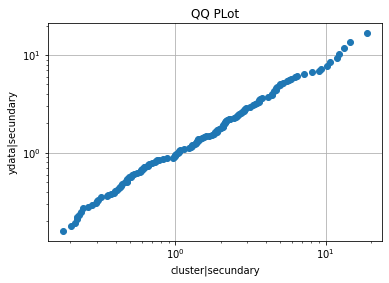

In [5]:
npoints = len(cluster['Secondary'])
ydata['Declustering Weight']=1
#using declustering wight
parameters_qpplt = {
     'qqorpp'  : 0,                             # Q-Q plot (qqorpp=0); P-P plot (qqorpp=1)
      'npts'   : npoints,                       # number of points to use on the Q-Q or P-P plot (should not exceed the smallest number of data in data1 / data2
       'va1'   : cluster['Secondary'],            # array('d') with bounds (nd)
       'va2'   : ydata['Secondary'],               # array('d') with bounds (nd)
       'wt1'   : cluster['Declustering Weight'],# array('d') with bounds (nd)
       'wt2'   : ydata['Declustering Weight']}   # array('d') with bounds (nd)

vr1a,vr2a,error = pygslib.gslib.__plot.qpplt(**parameters_qpplt)

print ('error ? ',  error != 0)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot (vr1a, vr2a, 'o')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel ('cluster|secundary')
ax.set_ylabel ('ydata|secundary')
ax.set_title ('QQ PLot')
plt.grid(True)
fig.show


error ?  False


<bound method Figure.show of <Figure size 432x288 with 1 Axes>>

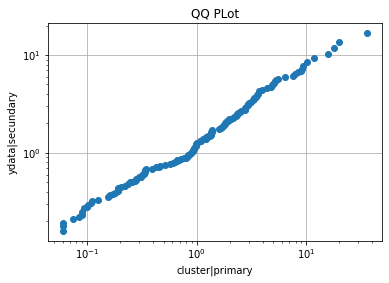

In [6]:
npoints = len(cluster['Secondary'])
ydata['Declustering Weight']=1
#using declustering wight
parameters_qpplt = {
     'qqorpp'  : 0,                             # Q-Q plot (qqorpp=0); P-P plot (qqorpp=1)
      'npts'   : npoints,                       # number of points to use on the Q-Q or P-P plot (should not exceed the smallest number of data in data1 / data2
       'va1'   : cluster['Primary'],            # array('d') with bounds (nd)
       'va2'   : ydata['Secondary'],               # array('d') with bounds (nd)
       'wt1'   : cluster['Declustering Weight'],# array('d') with bounds (nd)
       'wt2'   : ydata['Declustering Weight']}   # array('d') with bounds (nd)

vr1a,vr2a,error = pygslib.gslib.__plot.qpplt(**parameters_qpplt)

print ('error ? ',  error != 0)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot (vr1a, vr2a, 'o')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel ('cluster|primary')
ax.set_ylabel ('ydata|secundary')
ax.set_title ('QQ PLot')
plt.grid(True)
fig.show

## Testing bicalib

In [7]:
print (pygslib.gslib.__bicalib.__doc__)

This module '__bicalib' is auto-generated with f2py (version:1.21.1).
Functions:
  ssqu,avgu,umin,umax,ssqv,avgv,vmin,vmax,pdfrep,fract,yx,em,vm,nm,b,lcdf,error = bicalib(vval,u,v,wt,cutu,cutv,ndp=len(vval),nd=len(u),ncutu=len(cutu),ncutv=len(cutv))
.


In [8]:
parameters_bicalib = {
        'vval' : ydata['Secondary'],             # secondary data
        'u'    : cluster['Primary'],             # calibration scatterplot (primary data)
        'v'    : cluster['Secondary'],           # calibration scatterplot (secondary data)
        'wt'   : cluster['Declustering Weight'], # calibration scatterplot (weight data)
        'cutu' : [0.5,1.,2.5,5.,10.],            # thresholds on primary            
        'cutv' : [0.5,1.,2.5,5.,10.]}            # thresholds on secondary

ssqu,avgu,umin,umax,ssqv,avgv,vmin,vmax, \
pdfrep,fract,yx,em,vm,nm,b,lcdf,error = pygslib.gslib.__bicalib.bicalib(**parameters_bicalib)

print ('error ? ',  error != 0)


error ?  False


### Comparing results with the report file (bicalib.rep)
```
                  MARKOV-BAYES CALIBRATION REPORT
                  *******************************

       Number of pairs retained     =          140

       Primary variable:   average  =    2.52812052    
                           variance =    22.0867615    
                           minimum  =    5.99999987E-02
                           maximum  =    58.3199997    

       Secondary variable: average  =    2.52758455    
                           variance =    9.77680969    
                           minimum  =   0.180000007    
                           maximum  =    22.4599991  
                           
 Cutoffs on Primary Variable
  U cutoff  1 cutoff =       0.5000 cdf =  0.29924
  U cutoff  2 cutoff =       1.0000 cdf =  0.47028
  U cutoff  3 cutoff =       2.5000 cdf =  0.72501
  U cutoff  4 cutoff =       5.0000 cdf =  0.87425
  U cutoff  5 cutoff =      10.0000 cdf =  0.95929
  
 Number within each bivariate (u,v) class:
                0.50     1.00     2.50     5.00    10.00
      0.50 |    0.1927   0.0130   0.0094   0.0000   0.0000   0.0000
      1.00 |    0.0780   0.0568   0.0344   0.0068   0.0000   0.0000
      2.50 |    0.0067   0.0934   0.1416   0.0315   0.0205   0.0000
      5.00 |    0.0218   0.0000   0.0562   0.0917   0.0174   0.0032
     10.00 |    0.0000   0.0077   0.0131   0.0169   0.0256   0.0115
      Max. |        0.       0.       0.       0.       0.       0.


 The cumulative frequency (local prior cdf) table:
 0.89586 0.95633 1.00000 1.00000 1.00000 1.00000
 0.44297 0.76568 0.96116 1.00000 1.00000 1.00000
 0.02295 0.34097 0.82286 0.93023 1.00000 1.00000
 0.11440 0.11440 0.40956 0.89164 0.98330 1.00000
 0.00000 0.10326 0.27851 0.50410 0.84630 1.00000
 0.00000 0.00000 0.00000 0.04442 0.47650 1.00000

cutoff,total#,mean,Variance
  for U(x) <= cutoff 
     0.50    30 |    0.70124   0.07721
     1.00    47 |    0.71755   0.07886
     2.50    76 |    0.84762   0.04005
     5.00   101 |    0.93332   0.01228
    10.00   126 |    0.97366   0.00769
  for U(x) >  cutoff 
     0.50   110 |    0.12758   0.04022
     1.00    93 |    0.25076   0.04704
     2.50    64 |    0.40175   0.07353
     5.00    39 |    0.46354   0.13237
    10.00    14 |    0.62067   0.03795
    
 B(i) values:
 0.5737
 0.4668
 0.4459
 0.4698
 0.3530

 ```

In [9]:
[str(i) for i in [1,2,3]]

['1', '2', '3']

In [10]:
U_cutoff= np.arange(len(parameters_bicalib['cutu'])) +1
index = [str(i) for i in parameters_bicalib['cutu']]
index.append('max')
columns = [str(i) for i in parameters_bicalib['cutv']]
columns.append('max')
uv_class= pd.DataFrame(pdfrep, index= index, columns = columns)

U_le_cutoff = pd.DataFrame ({'cutoff': parameters_bicalib['cutu'], 'total':nm[:,1],'mean': em[:,1], 'var' : vm[:,1]})
U_ge_cutoff = pd.DataFrame ({'cutoff': parameters_bicalib['cutu'], 'total':nm[:,0],'mean': em[:,0], 'var' : vm[:,0]})


print ('      MARKOV-BAYES CALIBRATION REPORT ')
print (' ----------------------------------------')
print ('Primary variable:   average  =', avgu)
print ('                    variance =', ssqu)   
print ('                    minimum  =', umin)
print ('                    maximum  =', umax)
print ('Secondary variable: average  =', avgv)
print ('                    variance =', ssqv)   
print ('                    minimum  =', vmin)
print ('                    maximum  =', vmax)
print (' Cutoffs on Primary Variable ')
for i in U_cutoff:
    print ('  U cutoff', i, ' cutoff =  ', parameters_bicalib['cutu'][i-1], ' cdf = ' , fract[i-1])

print ('')
print ('Number within each bivariate (u,v) class:                               ??? max is differen ??? check this')    
print (uv_class)
print ('')
print (' The cumulative frequency (local prior cdf) table:')
print (yx)
print ('')
print ('cutoff,total#,mean,Variance') 
print ('  for U(x) <= cutoff ') 
print (U_le_cutoff)
print ('  for U(x) >  cutoff')
print (U_ge_cutoff)
print ('')
print (pd.DataFrame({'B(i) values:':b}))


      MARKOV-BAYES CALIBRATION REPORT 
 ----------------------------------------
Primary variable:   average  = 2.528120517730713
                    variance = 22.086761474609375
                    minimum  = 0.05999999865889549
                    maximum  = 58.31999969482422
Secondary variable: average  = 2.5275845527648926
                    variance = 9.776809692382812
                    minimum  = 0.18000000715255737
                    maximum  = 22.459999084472656
 Cutoffs on Primary Variable 
  U cutoff 1  cutoff =   0.5  cdf =  0.29924345
  U cutoff 2  cutoff =   1.0  cdf =  0.47028258
  U cutoff 3  cutoff =   2.5  cdf =  0.7250056
  U cutoff 4  cutoff =   5.0  cdf =  0.8742452
  U cutoff 5  cutoff =   10.0  cdf =  0.95929337

Number within each bivariate (u,v) class:                               ??? max is differen ??? check this
           0.5       1.0       2.5       5.0      10.0       max
0.5   0.192696  0.013007  0.009393  0.000000  0.000000  0.000000
1.0   0.07803

**Note:**
This is also comparable to data on file for output calibration (SISIM), or *bicalib.cal* in the *.par file above 
```
 Thresholds for secondary variable
           5
  0.500000000    
   1.00000000    
   2.50000000    
   5.00000000    
   10.0000000    
 The local prior distribution table:
 0.89586 0.95633 1.00000 1.00000 1.00000
 0.44297 0.76568 0.96116 1.00000 1.00000
 0.02295 0.34097 0.82286 0.93023 1.00000
 0.11440 0.11440 0.40956 0.89164 0.98330
 0.00000 0.10326 0.27851 0.50410 0.84630
 0.00000 0.00000 0.00000 0.04442 0.47650
 The calibration parameters B(i): 
 0.5737
 0.4668
 0.4459
 0.4698
 0.3530
```

### Comparing with results in the file for output data / distributions (bicalib.out)

In [11]:
names=['P_Thr_'+x for x in map (str , parameters_bicalib['cutu'])]
Ptr=pd.DataFrame(lcdf, columns= names)
print (Ptr.head())

   P_Thr_0.5  P_Thr_1.0  P_Thr_2.5  P_Thr_5.0  P_Thr_10.0
0   0.114402   0.114402   0.409563   0.891641    0.983298
1   0.114402   0.114402   0.409563   0.891641    0.983298
2   0.022947   0.340974   0.822864   0.930235    1.000000
3   0.022947   0.340974   0.822864   0.930235    1.000000
4   0.442971   0.765681   0.961156   1.000000    1.000000


**expected results **
```
                         pt0.5   pt1.0   pt2.5   pt5.0  pt10.0
  .5   .5 -1.00  3.26   0.1144  0.1144  0.4096  0.8916  0.9833
 1.5   .5 -1.00  2.64   0.1144  0.1144  0.4096  0.8916  0.9833
 2.5   .5 -1.00  2.15   0.0229  0.3410  0.8229  0.9302  1.0000
 3.5   .5 -1.00  1.69   0.0229  0.3410  0.8229  0.9302  1.0000
 4.5   .5 -1.00   .51   0.4430  0.7657  0.9612  1.0000  1.0000
```

In [12]:
print (Ptr.tail())


      P_Thr_0.5  P_Thr_1.0  P_Thr_2.5  P_Thr_5.0  P_Thr_10.0
2495        0.0   0.103261   0.278509     0.5041      0.8463
2496        0.0   0.103261   0.278509     0.5041      0.8463
2497        0.0   0.103261   0.278509     0.5041      0.8463
2498        0.0   0.103261   0.278509     0.5041      0.8463
2499        0.0   0.103261   0.278509     0.5041      0.8463


**expected results **
```
                         pt0.5   pt1.0   pt2.5   pt5.0  pt10.0
45.5 49.5 -1.00  8.82   0.0000  0.1033  0.2785  0.5041  0.8463
46.5 49.5 -1.00  7.97   0.0000  0.1033  0.2785  0.5041  0.8463
47.5 49.5 -1.00  8.62   0.0000  0.1033  0.2785  0.5041  0.8463
48.5 49.5 -1.00  6.59   0.0000  0.1033  0.2785  0.5041  0.8463
49.5 49.5 -1.00  5.83   0.0000  0.1033  0.2785  0.5041  0.8463
```